# Price Optimization

Price optimization is the process of setting prices for a product in such a way that maximizes profits. This done by finding the profitability point where demand and supply curves intersect. In real world scenarios, where these curves aren't known, price optimization data can be gathered with a combo of techniques: competitor analysis, customer segmentation, price testing, and demand forecasting. Each of these processes outputs a different piece of the optimization puzzle, while also creating positive second order effects in customer understanding and future planning. Once the data is collected, we can use most any type of regression technique to find the optimal price points. Businesses that can optimize their pricing stand to gain a solid competitive edge, while maximizing the volume and margins of their products. In this notebook, we'll explore 4 methods of regression-based price optimization:
1. Linear Regression
2. Random Forest
3. XGBoost
4. SVR

## Importing Libraries and Data

We'll be using a popular dataset from Kaggle, linked [here](https://www.kaggle.com/datasets/suddharshan/retail-price-optimization?resource=download). We'll start by importing the libraries we know we'll use, then importing our csv dataset:

In [1]:
# pip install numpy matplotlib pandas seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("price_optim_data.csv", parse_dates=['month_year'])
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

In [4]:
df.describe()

,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2017-07-16 20:54:40.473372928,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,21.773669,8.658284,1.494083,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
min,2017-01-01 00:00:00,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,20.000000,8.000000,0.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,2017-01-09 00:00:00,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,21.000000,8.000000,1.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,2018-01-01 00:00:00,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,22.000000,9.000000,1.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,2018-01-04 00:00:00,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,23.000000,9.000000,2.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,2018-01-08 00:00:00,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,23.000000,10.000000,4.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000
std,NaN,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,0.986104,0.705600,0.940430,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657


Our dataset is a list of transaction line items from a store. Each row represents a day of sales for an item. Each row has a product ID, product category, date, quantity sold, total and unit price and a shipping (freight) price. Eahc row also has some descriptive info, like product name length, description length, number of product photos, product weight, and product review score. Each row also contains some store-level data, like the number of daily customers and some date info (weekday, weekend, holiday, month, year). After that, each row has some competitive data from 3 competitors. For each competitor, there's a product price (comp_1, comp_2, comp_3), a review score (ps1, ps2, ps3), and a shipping cost (fp1, fp2, fp3). 

Some of these names are a little unintuitive, so let's start preprocessing by renaming some columns:

## Preprocessing

In [5]:
# Rename shipping cost, product description data, review stars, competitor prices, competitor review stars, competitor shipping costs
df.rename(columns={'freight_price': 'shipping_cost'}, inplace=True)
df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)
df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)
df.rename(columns={'product_score': 'review_stars'}, inplace=True)
df.rename(columns={'comp_1': 'comp_1_price'}, inplace=True)
df.rename(columns={'ps1': 'comp_1_review_stars'}, inplace=True)
df.rename(columns={'fp1': 'comp_1_shipping_cost'}, inplace=True)
df.rename(columns={'comp_2': 'comp_2_price'}, inplace=True)
df.rename(columns={'ps2': 'comp_2_review_stars'}, inplace=True)
df.rename(columns={'fp2': 'comp_2_shipping_cost'}, inplace=True)
df.rename(columns={'comp_3': 'comp_3_price'}, inplace=True)
df.rename(columns={'ps3': 'comp_3_review_stars'}, inplace=True)
df.rename(columns={'fp3': 'comp_3_shipping_cost'}, inplace=True)

# Resample to month granularity and create date col 
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   shipping_cost               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_length         676 non-null    int64         
 8   product_description_length  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  review_stars                676 non-null    float64       

Let's drop a few useless columns:

In [6]:
cols_to_drop = ['product_name_length', 'product_description_length', 'product_photos_qty', 'weekday', 'weekend', 'holiday', 's']
df.drop(columns=cols_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             676 non-null    object        
 1   product_category_name  676 non-null    object        
 2   month_year             676 non-null    datetime64[ns]
 3   qty                    676 non-null    int64         
 4   total_price            676 non-null    float64       
 5   shipping_cost          676 non-null    float64       
 6   unit_price             676 non-null    float64       
 7   product_weight_g       676 non-null    int64         
 8   review_stars           676 non-null    float64       
 9   customers              676 non-null    int64         
 10  month                  676 non-null    int64         
 11  year                   676 non-null    int64         
 12  volume                 676 non-null    int64         
 13  comp_

Now that the data is a little easier to read, we can get on with some EDA:

(Normally I'd impute null values here, but everything is clean in this dataset)

## EDA

Let's start by checking the distribution of some major features:

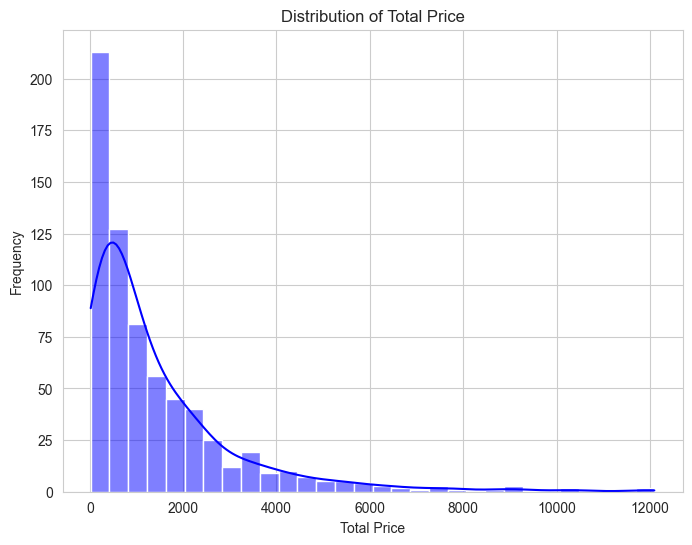

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

Most of our rows have a total price of less than $500, and the distribution follows a pretty normal curve from there. Let's check the distribution of review scores:

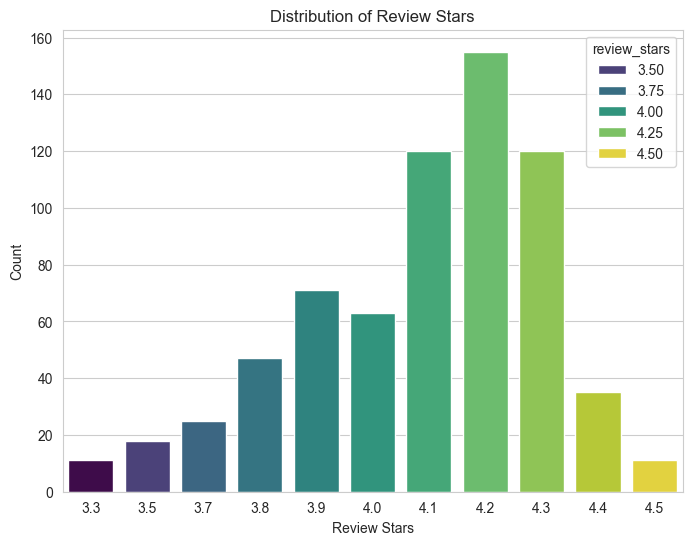

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='review_stars', data=df, palette='viridis', hue='review_stars')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

Most products have an average star rating of 4.1-4.3, which lines up with real-world experience. There's a significant decline in products above 4.3 stars, but the distribution slopes off normally towards 3 stars. Let's check total sales over time:

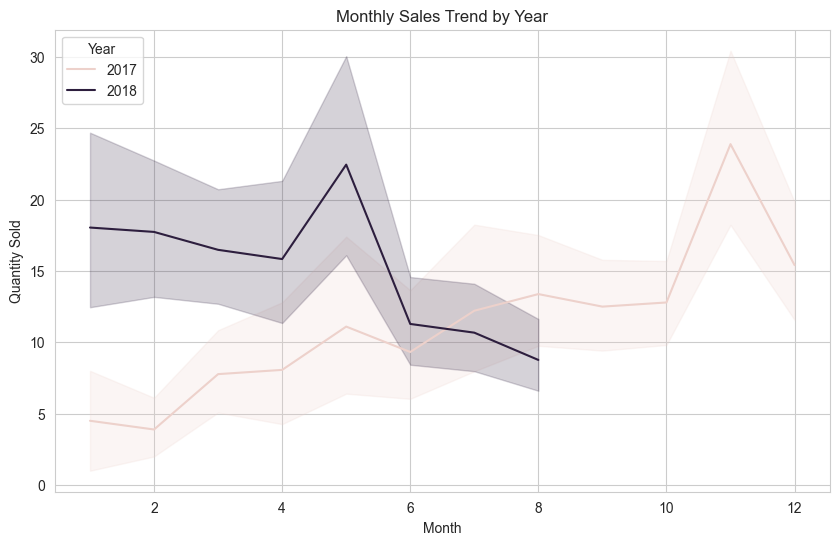

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='qty', hue='year', data=df)
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Year')
plt.show()

Interesting--sales in early 2017 are less than half as high as 2018. There's a sharp uptick in November, perhaps due to holiday shopping. Similarly, there's a strong uptick in May of 2018. I wonder if that uptick is from a specific category, or if it's just higher sales in general.

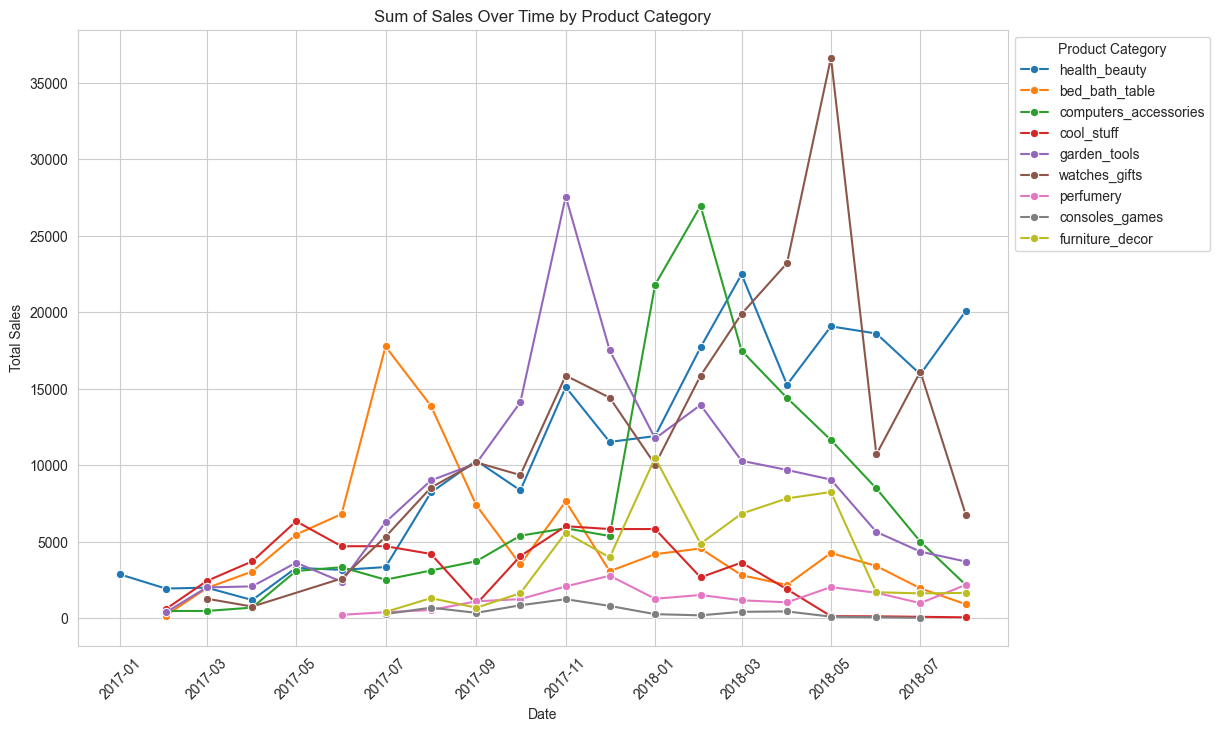

In [10]:
plt.figure(figsize=(12, 8))
sales_over_time = df.groupby(['date', 'product_category_name'])['total_price'].sum().reset_index()
sns.lineplot(data=sales_over_time, x='date', y='total_price', hue='product_category_name', marker='o', palette='tab10')
plt.title('Sum of Sales Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Looks like the spike in May 2018 is due to a huge increase in 'watches_gifts'. Perhaps somebody bought an expensive watch! 

Let's check the relationship between total price and total quantity: 

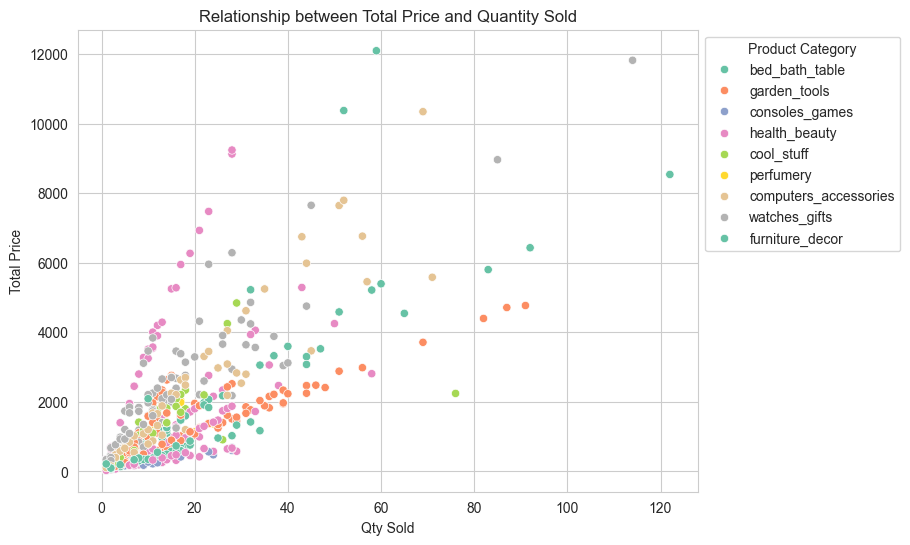

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='qty', y='total_price', data=df, hue='product_category_name', palette='Set2')
plt.title('Relationship between Total Price and Quantity Sold')
plt.xlabel('Qty Sold')
plt.ylabel('Total Price')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1))
plt.show()

Each product category seems to have one or more linear relationships, which indicates the prices of each product stay consistent across quantity--no bulk discounts or anything. The health and beauty category seems to have a very expensive product, notated in the steep pink line. 

Let's dive into the competitive data by starting with price differences across product categories:

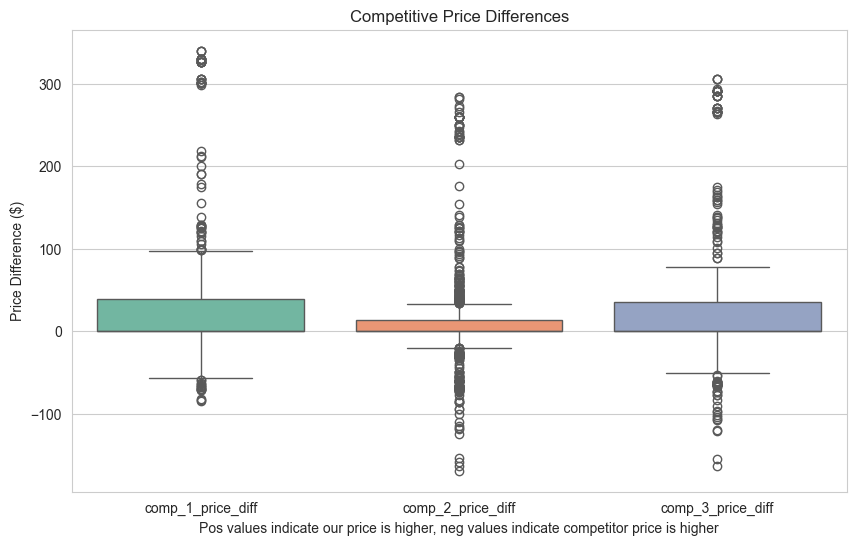

In [22]:
df['comp_1_price_diff'] = df['unit_price'] - df['comp_1_price']
df['comp_2_price_diff'] = df['unit_price'] - df['comp_2_price']
df['comp_3_price_diff'] = df['unit_price'] - df['comp_3_price']

plt.figure(figsize=(10, 6))
df_price_diff = df.melt(id_vars=['product_id'], value_vars=['comp_1_price_diff', 'comp_2_price_diff', 'comp_3_price_diff'],
                        var_name='Competitor', value_name='Price Difference')
sns.boxplot(x='Competitor', y='Price Difference', data=df_price_diff, palette='Set2', hue='Competitor')
plt.title('Competitive Price Differences')
plt.xlabel('Pos values indicate our price is higher, neg values indicate competitor price is higher')
plt.ylabel('Price Difference ($)')
plt.show()

Overall, we tend to be more expensive than the competition, often by a significant amount. Let's drill down and split these differences by product category:

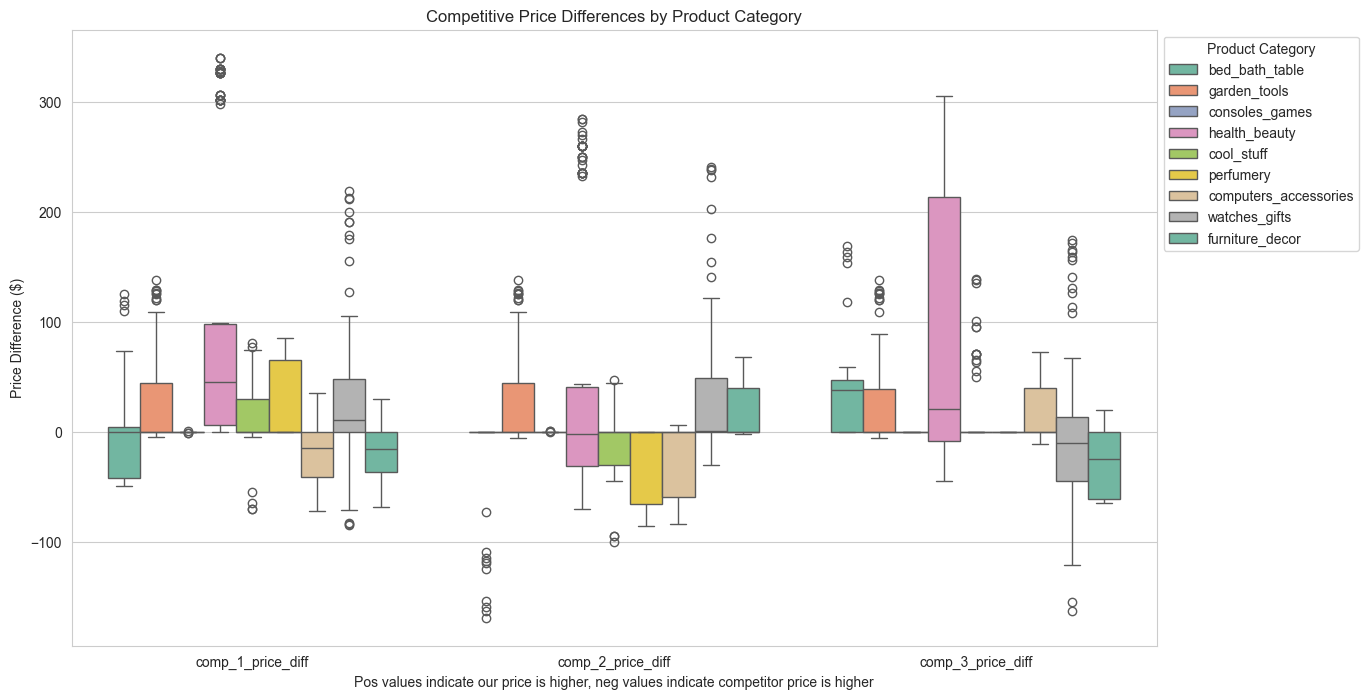

In [23]:
plt.figure(figsize=(14, 8))
price_diff_category = df.melt(id_vars=['product_id', 'product_category_name'], value_vars=['comp_1_price_diff', 'comp_2_price_diff', 'comp_3_price_diff'],
                        var_name='Competitor', value_name='Price Difference')
sns.boxplot(x='Competitor', y='Price Difference', hue='product_category_name', data=price_diff_category, palette='Set2')
plt.title('Competitive Price Differences by Product Category')
plt.xlabel('Pos values indicate our price is higher, neg values indicate competitor price is higher')
plt.ylabel('Price Difference ($)')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1))
plt.show()

This gives a lot more insight. On the whole, all 4 companies tend to be at rough price parity. There are some notable exceptions:
- Competitor 2 is significantly more expensive in the 'bed_bath_table' category
- We are substantially more expensive in the 'health_beauty' and 'watches_gifts' categories

Aside from those three categories, all companies have about the same pricing.

Does the same hold true for shipping costs?

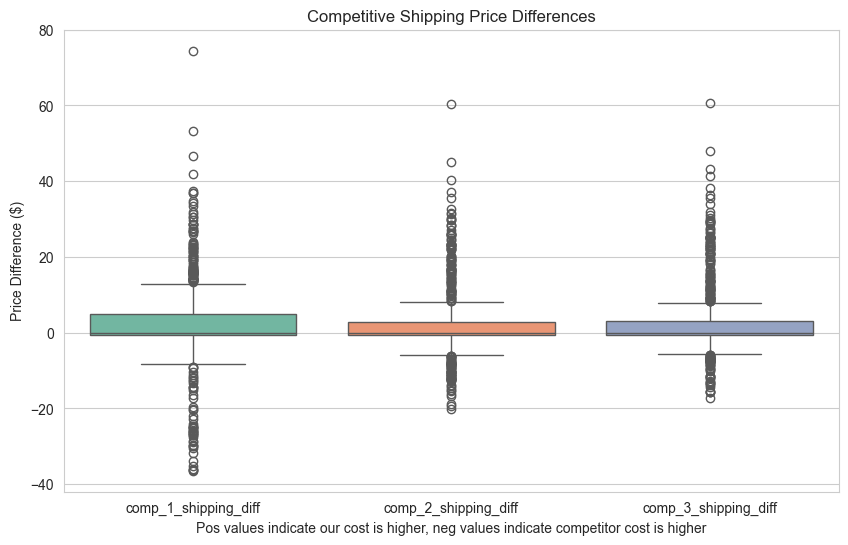

In [24]:
df['comp_1_shipping_diff'] = df['shipping_cost'] - df['comp_1_shipping_cost']
df['comp_2_shipping_diff'] = df['shipping_cost'] - df['comp_2_shipping_cost']
df['comp_3_shipping_diff'] = df['shipping_cost'] - df['comp_3_shipping_cost']

plt.figure(figsize=(10, 6))
df_shipping_diff = df.melt(id_vars=['product_id'], value_vars=['comp_1_shipping_diff', 'comp_2_shipping_diff', 'comp_3_shipping_diff'],
                        var_name='Competitor', value_name='Shipping Price Difference')
sns.boxplot(x='Competitor', y='Shipping Price Difference', data=df_shipping_diff, palette='Set2', hue='Competitor')
plt.title('Competitive Shipping Price Differences')
plt.xlabel('Pos values indicate our cost is higher, neg values indicate competitor cost is higher')
plt.ylabel('Price Difference ($)')
plt.show()

Looks like shipping costs are similar on the whole, though our costs tend to be $3-$5 higher than the competition. There are some definite outliers--maybe those correlate with large and bulky items?

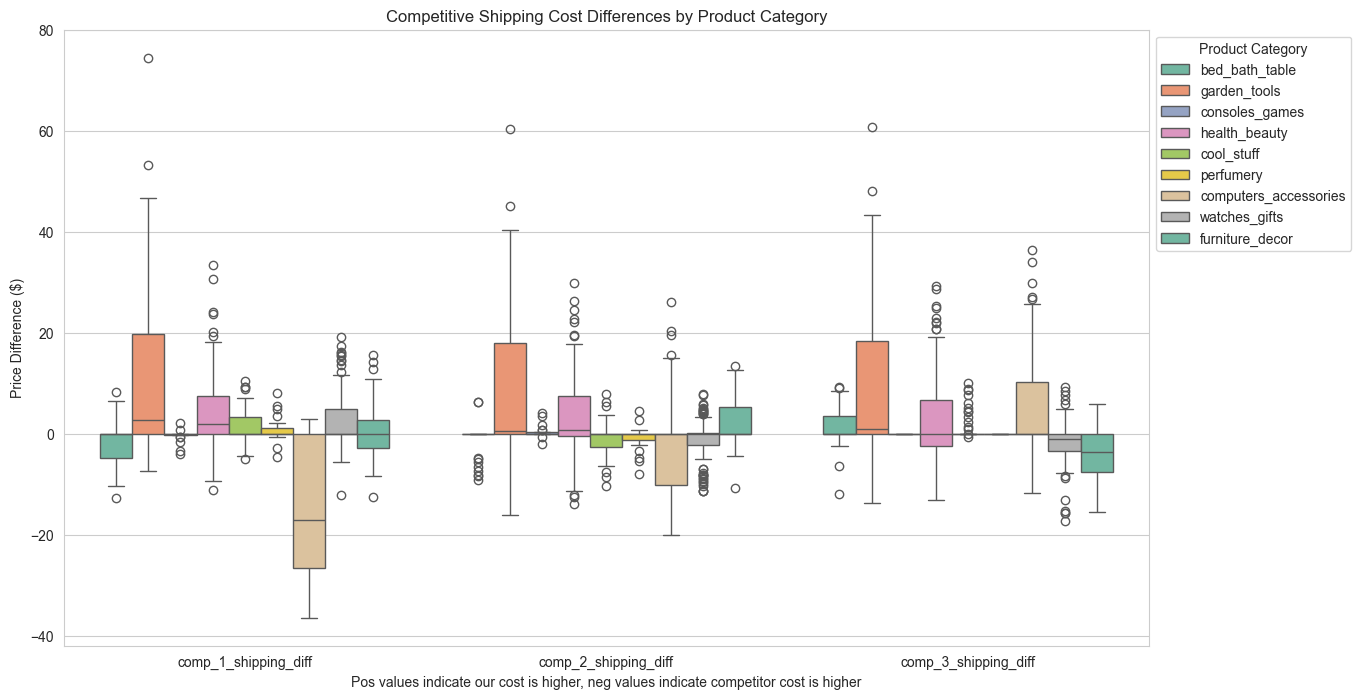

In [26]:
plt.figure(figsize=(14, 8))
shipping_diff_category = df.melt(id_vars=['product_id', 'product_category_name'], value_vars=['comp_1_shipping_diff', 'comp_2_shipping_diff', 'comp_3_shipping_diff'],
                        var_name='Competitor', value_name='Shipping Price Difference')
sns.boxplot(x='Competitor', y='Shipping Price Difference', hue='product_category_name', data=shipping_diff_category, palette='Set2')
plt.title('Competitive Shipping Cost Differences by Product Category')
plt.xlabel('Pos values indicate our cost is higher, neg values indicate competitor cost is higher')
plt.ylabel('Price Difference ($)')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1))
plt.show()

Our shipping costs tend to be higher in 'garden_tools' and 'health_beauty', but competitor 1 tends to have more expensive shipping in 'computers_accessories'.

To wrap up our EDA, let's check correlation across features:

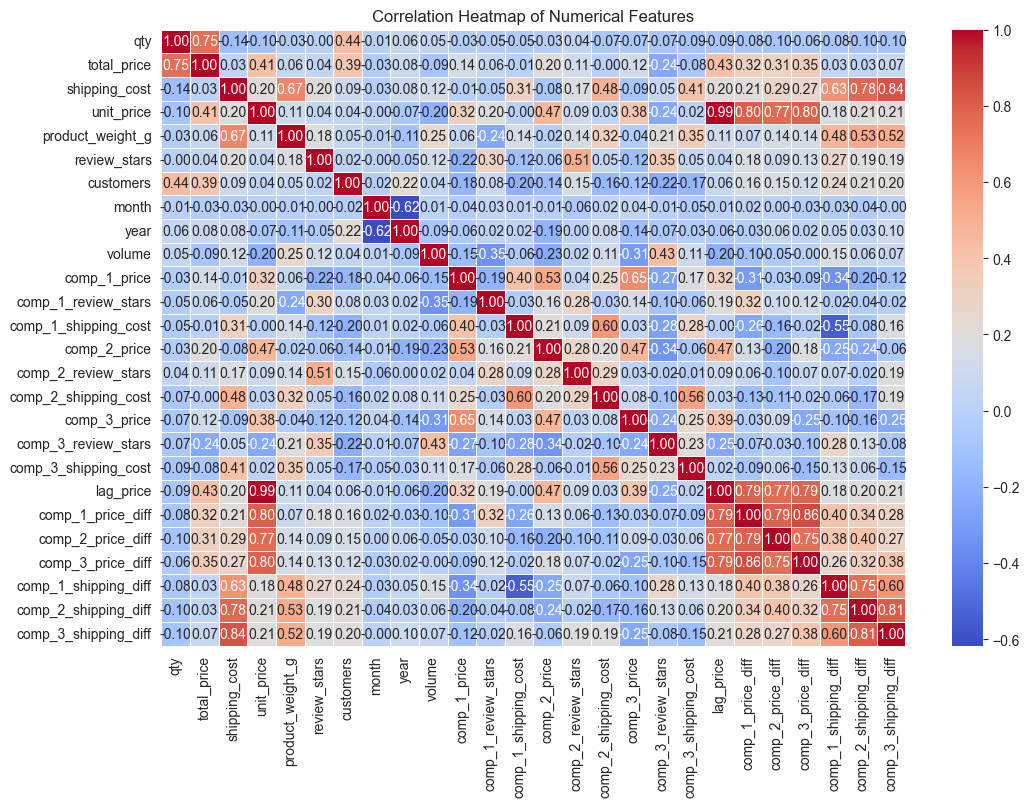

In [28]:
plt.figure(figsize=(12, 8))
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Model Building

### Linear Regression

### Random Forest

### XGBoost

### SVR

## Model Accuracy

## Visualization

## Conclusion